<a href="https://colab.research.google.com/github/amd-rezaei/colab_gists/blob/main/Pareto_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

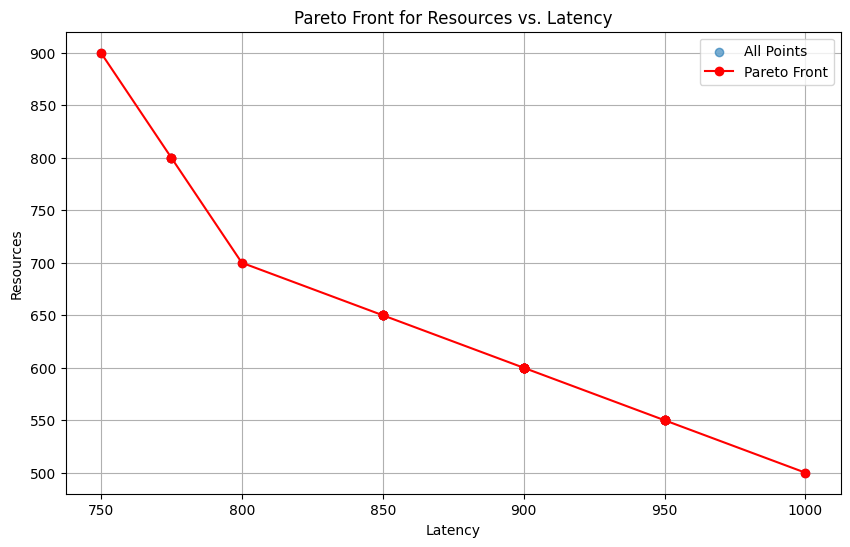

In [4]:
import json
import matplotlib.pyplot as plt

# Load the JSON file
with open("FC_2Layer_INT8_global_pareto.json", "r") as file:
    data = json.load(file)

# Extract latency and resources
latency = [item["latency"] for item in data]
resources = [item["resources"] for item in data]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(latency, resources, label="All Points", alpha=0.6)
plt.xlabel("Latency")
plt.ylabel("Resources")
plt.title("Pareto Front for Resources vs. Latency")
plt.grid(True)

# Highlight Pareto-optimal points
pareto_front = sorted(zip(latency, resources), key=lambda x: x[0])
pareto_points = [pareto_front[0]]

for point in pareto_front[1:]:
    if point[1] <= pareto_points[-1][1]:  # Check if the point is Pareto-optimal
        pareto_points.append(point)

pareto_latencies, pareto_resources = zip(*pareto_points)

plt.plot(pareto_latencies, pareto_resources, '-o', label="Pareto Front", color='red')
plt.legend()
plt.show()


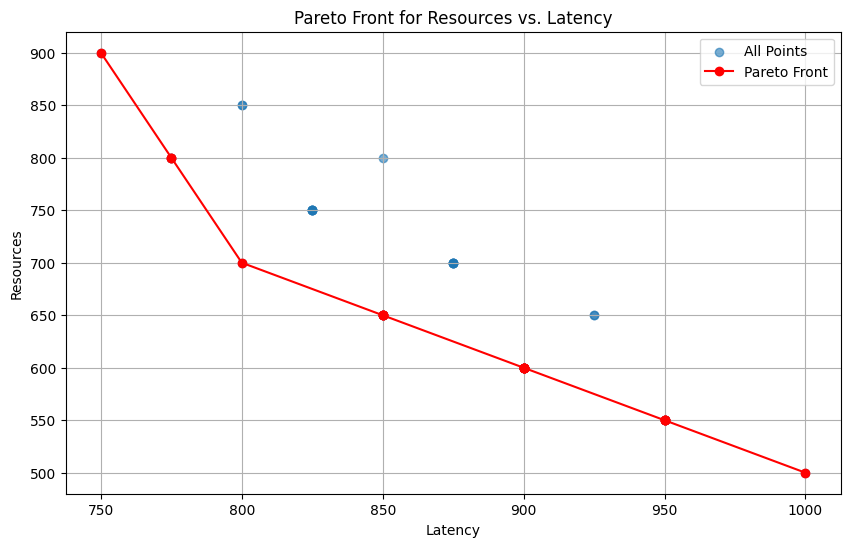

In [6]:
import json
import matplotlib.pyplot as plt

# Load the JSON file
with open("FC_2Layer_INT8_all_strategies.json", "r") as file:
    data = json.load(file)

# Extract latency and resources
latency = [item["latency"] for item in data]
resources = [item["resources"] for item in data]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(latency, resources, label="All Points", alpha=0.6)
plt.xlabel("Latency")
plt.ylabel("Resources")
plt.title("Pareto Front for Resources vs. Latency")
plt.grid(True)

# Highlight Pareto-optimal points
pareto_front = sorted(zip(latency, resources), key=lambda x: x[0])
pareto_points = [pareto_front[0]]

for point in pareto_front[1:]:
    if point[1] <= pareto_points[-1][1]:  # Check if the point is Pareto-optimal
        pareto_points.append(point)

pareto_latencies, pareto_resources = zip(*pareto_points)

plt.plot(pareto_latencies, pareto_resources, '-o', label="Pareto Front", color='red')
plt.legend()
plt.show()


In [8]:
import json
import matplotlib.pyplot as plt

# Load JSON data from files
def load_json_from_file(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

# Replace these with your file paths
file1 = "FC_2Layer_INT8_all_strategies.json"
file2 = "FC_2Layer_INT8_global_pareto.json"

json1 = load_json_from_file(file1)
json2 = load_json_from_file(file2)

# Normalize and extract latency and resources
def extract_latency_resources(data):
    latencies = []
    resources = []
    for item in data:
        latency = item["latency"]
        resource = item["resources"]
        # Normalize resource if it's a dictionary
        if isinstance(resource, dict):
            resource = resource.get("cores", 0)  # Use 'cores' if it's a dictionary
        latencies.append(latency)
        resources.append(resource)
    return latencies, resources

latencies1, resources1 = extract_latency_resources(json1)
latencies2, resources2 = extract_latency_resources(json2)

# Function to compute Pareto front
def pareto_front(latencies, resources):
    sorted_points = sorted(zip(latencies, resources), key=lambda x: x[0])  # Sort by latency
    pareto_points = [sorted_points[0]]
    for point in sorted_points[1:]:
        if point[1] <= pareto_points[-1][1]:  # Check for Pareto-optimality
            pareto_points.append(point)
    return zip(*pareto_points)

# Compute Pareto fronts
pareto_lat1, pareto_res1 = pareto_front(latencies1, resources1)
pareto_lat2, pareto_res2 = pareto_front(latencies2, resources2)

# Plot the data
plt.figure(figsize=(12, 8))
plt.scatter(latencies1, resources1, label="Dataset 1 - All Points", alpha=0.6)
plt.scatter(latencies2, resources2, label="Dataset 2 - All Points", alpha=0.6, marker='^')
plt.plot(pareto_lat1, pareto_res1, '-o', label="Pareto Front - Dataset 1", color='red')
plt.plot(pareto_lat2, pareto_res2, '-o', label="Pareto Front - Dataset 2", color='blue')
plt.xlabel("Latency")
plt.ylabel("Resources")
plt.title("Pareto Fronts: Resource vs. Latency")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'plot_pareto' is not defined

In [16]:
import json
import matplotlib.pyplot as plt

# Function to load JSON data from a file
def load_json_from_file(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

# Function to extract latency and resources
def extract_latency_resources(data):
    latencies = []
    resources = []
    for item in data:
        latency = item["latency"]
        resource = item["resources"]
        # Normalize resource if it's a dictionary
        if isinstance(resource, dict):
            resource = resource.get("cores", 0)  # Use 'cores' if it's a dictionary
        latencies.append(latency)
        resources.append(resource)
    return latencies, resources

# Function to compute Pareto front
def pareto_front(latencies, resources):
    sorted_points = sorted(zip(latencies, resources), key=lambda x: x[0])  # Sort by latency
    pareto_points = [sorted_points[0]]
    for point in sorted_points[1:]:
        if point[1] <= pareto_points[-1][1]:  # Check for Pareto-optimality
            pareto_points.append(point)
    return zip(*pareto_points)

# Function to plot Pareto front
def plot_pareto(latencies, resources, pareto_lat, pareto_res, title, color):
    plt.figure(figsize=(10, 6))
    plt.scatter(latencies, resources, label=f"All Points", alpha=0.6)
    plt.plot(pareto_lat, pareto_res, '-o', label=f"Pareto Front", color=color)
    plt.xlabel("Latency")
    plt.ylabel("Resources")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


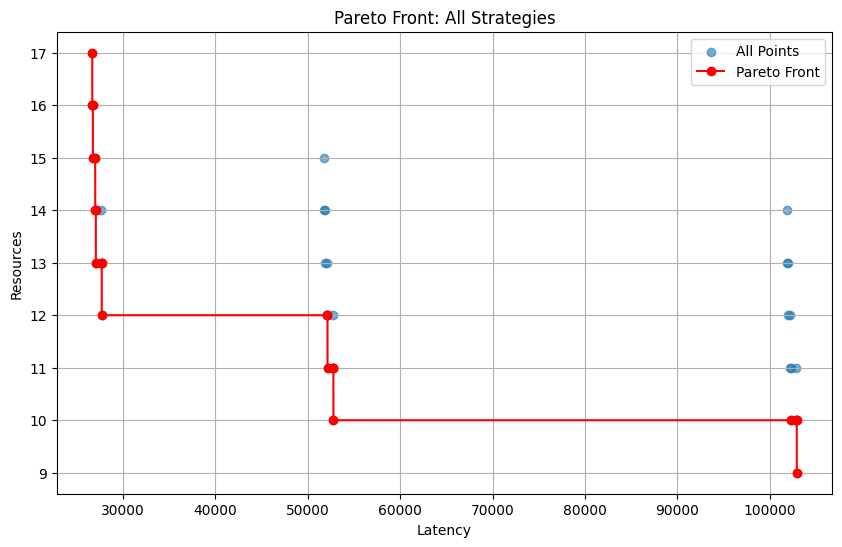

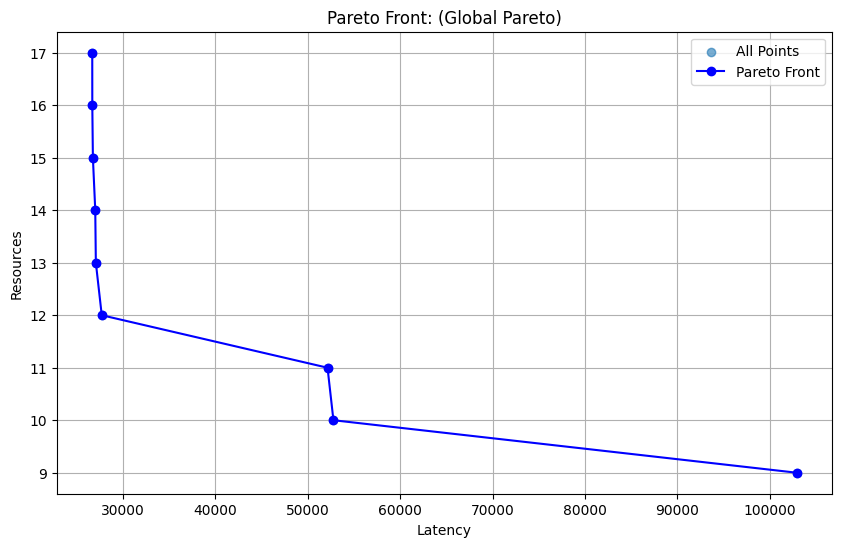

In [19]:
# Replace these with your file paths
file1 = "FC_2Layer_INT8_all_strategies.json"
file2 = "FC_2Layer_INT8_global_pareto.json"

# Load datasets
json1 = load_json_from_file(file1)
json2 = load_json_from_file(file2)

# Extract latencies and resources
latencies1, resources1 = extract_latency_resources(json1)
latencies2, resources2 = extract_latency_resources(json2)

# Compute Pareto fronts
pareto_lat1, pareto_res1 = pareto_front(latencies1, resources1)
pareto_lat2, pareto_res2 = pareto_front(latencies2, resources2)

# Plot for Dataset 1
plot_pareto(
    latencies1,
    resources1,
    pareto_lat1,
    pareto_res1,
    "Pareto Front: All Strategies",
    "red",
)

# Plot for Dataset 2
plot_pareto(
    latencies2,
    resources2,
    pareto_lat2,
    pareto_res2,
    "Pareto Front: (Global Pareto)",
    "blue",
)
